In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq
import numpy as np

In [16]:
# Path to the data directory
data_path = os.path.join(os.getcwd(), "data")

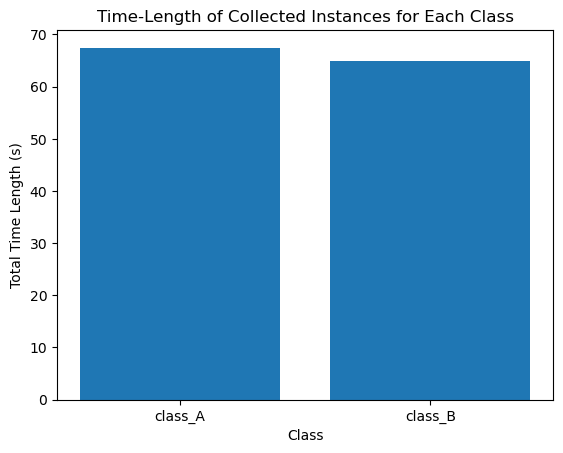

In [17]:
# Step 1: Barplot of Time-Length of Collected Instances for Each Class
time_lengths = {}

classes_folders_list = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]

for class_folder in classes_folders_list:
    folder_path = os.path.join(data_path, class_folder)
    files_in_folder = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    total_time = 0
    
    for file_name in files_in_folder:
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        elapsed_time = df['elapsed (s)'].iloc[-1]  # Get the last value in 'elapsed (s)' column
        total_time += elapsed_time
    
    time_lengths[class_folder] = total_time

# Plotting the barplot
plt.bar(time_lengths.keys(), time_lengths.values())
plt.xlabel('Class')
plt.ylabel('Total Time Length (s)')
plt.title('Time-Length of Collected Instances for Each Class')
plt.show()

In [18]:
# Step 2: Split Data into Fixed Windows
def split_into_windows(data, window_size, overlap):
    step_size = window_size * (1 - overlap)
    windows = []
    for start in range(0, len(data), int(step_size)):
        end = start + window_size
        if end <= len(data):
            windows.append(data[start:end])
    return np.array(windows)

window_size = 100  # Define window size in samples
overlap = 0.5  # Define overlap percentage

In [19]:
# Step 3: Barplot of Count of Instances after Windowing for Each Class
window_counts = {}

for class_folder in classes_folders_list:
    folder_path = os.path.join(data_path, class_folder)
    files_in_folder = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    total_windows = 0
    
    for file_name in files_in_folder:
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        data = df['x-axis (deg/s)'].values  # Example column data
        windows = split_into_windows(data, window_size, overlap)
        total_windows += len(windows)
    
    window_counts[class_folder] = total_windows

# Plotting the barplot
plt.bar(window_counts.keys(), window_counts.values())
plt.xlabel('Class')
plt.ylabel('Count of Instances')
plt.title('Count of Instances after Windowing for Each Class')
plt.show()

KeyError: 'x-axis (deg/s)'

In [ ]:
# Step 4: Filter Data with Low-Pass Filter
def low_pass_filter(data, cutoff_frequency, sampling_rate):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(4, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

cutoff_frequency = 1.0  # Define cutoff frequency in Hz
sampling_rate = 100  # Define sampling rate in Hz

# Apply the filter and plot the data for a single instance as an example
class_folder = classes_folders_list[0]
file_name = os.listdir(os.path.join(data_path, class_folder))[0]
file_path = os.path.join(data_path, class_folder, file_name)
df = pd.read_csv(file_path)
sample_data = df['x-axis (deg/s)'].values  # Example column data
filtered_data = low_pass_filter(sample_data, cutoff_frequency, sampling_rate)

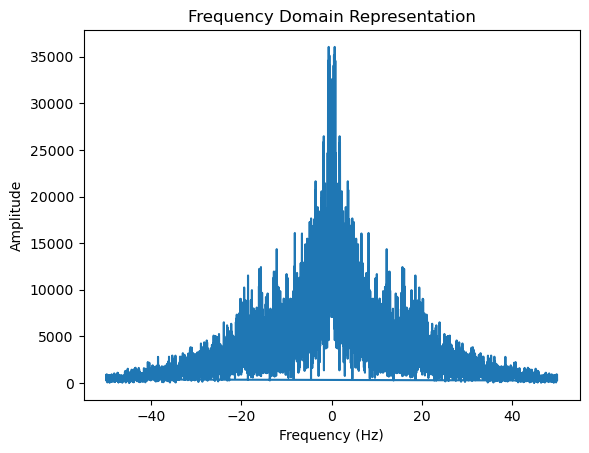

In [ ]:
# Step 5: Transform Data into Frequency Domain
def transform_to_frequency_domain(data, sampling_rate):
    n = len(data)
    yf = fft(data)
    xf = fftfreq(n, 1 / sampling_rate)
    return xf, np.abs(yf)

xf, yf = transform_to_frequency_domain(sample_data, sampling_rate)

plt.plot(xf, yf)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Representation')
plt.show()

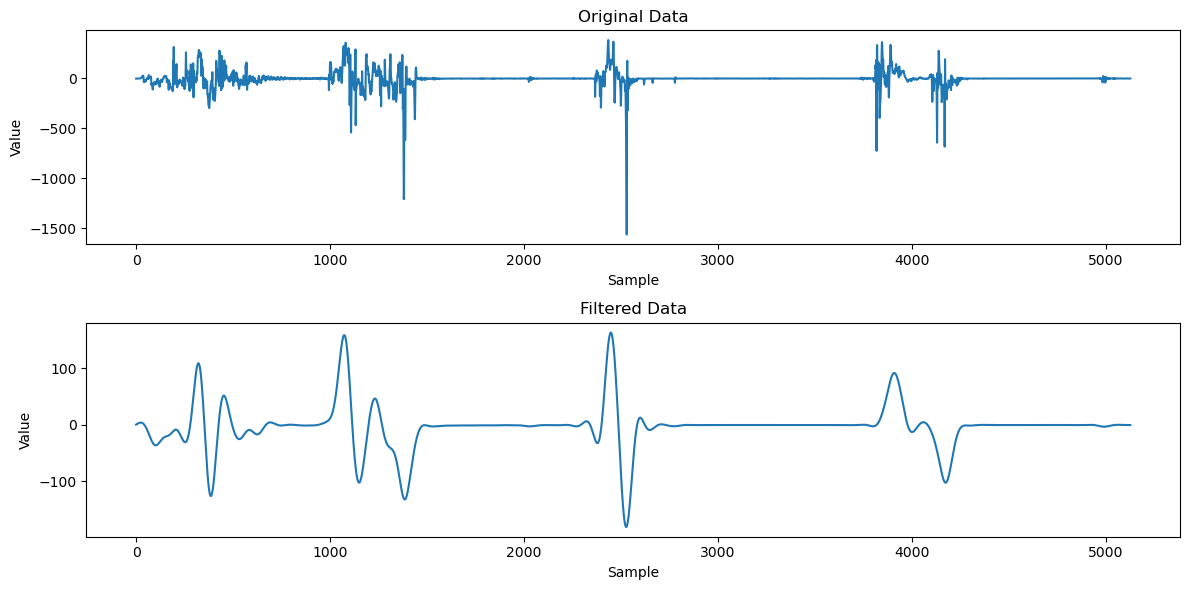

In [ ]:
# Step 6: Visualize Time-Series Instance of Transformed Dataset
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(2, 1, 1)
plt.plot(sample_data)
plt.title('Original Data')
plt.xlabel('Sample')
plt.ylabel('Value')

# Filtered data
plt.subplot(2, 1, 2)
plt.plot(filtered_data)
plt.title('Filtered Data')
plt.xlabel('Sample')
plt.ylabel('Value')

plt.tight_layout()
plt.show()